In [15]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shutil

In [19]:
videos = ['BrushingTeeth','BabyCrawling','FloorGymnastics','SoccerPenalty','ApplyLipstick']

data = []
for video in videos:
    files = [os.path.basename(x) for x in glob.glob("UCF-101/"+video+"/*.avi")]
    for fil in files:
        data.append([fil,video])

dataset = pd.DataFrame(data, columns=['FileName', 'Class'])
dataset.head()

,FileName,Class
0,v_BrushingTeeth_g03_c01.avi,BrushingTeeth
1,v_BrushingTeeth_g16_c01.avi,BrushingTeeth
2,v_BrushingTeeth_g22_c03.avi,BrushingTeeth
3,v_BrushingTeeth_g10_c05.avi,BrushingTeeth
4,v_BrushingTeeth_g01_c04.avi,BrushingTeeth


In [20]:
print(dataset['Class'].value_counts())
print(dataset.shape)
print("Total No. of Videos: ",dataset.shape[0])
dataset.info()

SoccerPenalty      137
BabyCrawling       132
BrushingTeeth      131
FloorGymnastics    125
ApplyLipstick      114
Name: Class, dtype: int64
(639, 2)
Total No. of Videos:  639
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 2 columns):
FileName    639 non-null object
Class       639 non-null object
dtypes: object(2)
memory usage: 10.1+ KB


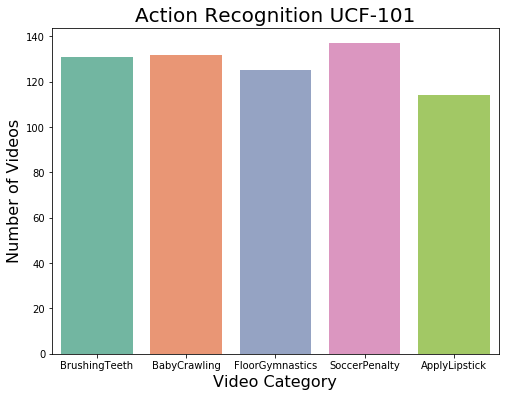

In [24]:
plt.figure(figsize=(8,6))
sns.countplot(dataset['Class'], order=videos, palette='Set2')
plt.title('Action Recognition UCF-101',fontsize=20)
plt.xlabel('Video Category', fontsize=16)
plt.ylabel('Number of Videos', fontsize=16)
plt.show()

In [12]:
def get_train_test_lists():
   
    test_file = 'testlist.txt'
    train_file = 'trainlist.txt'

    # Build the test list.
    with open(test_file) as fin:
        test_list = [row.strip() for row in list(fin)]

    # Build the train list. Extra step to remove the class index.
    with open(train_file) as fin:
        train_list = [row.strip() for row in list(fin)]
        train_list = [row.split(' ')[0] for row in train_list]

    # Set the groups in a dictionary.
    file_groups = {
        'train': train_list,
        'test': test_list
    }

    return file_groups

In [16]:
def copy_files(file_groups):
    datasetpath ='UCF-101/'
    # Do each of our groups.
    for group, videos in file_groups.items():
        print("Copying ",group," list - ", videos[0].split('/')[0])
        # Do each of our videos.
        for video in videos:

            # Get the parts.
            parts = video.split('/')
            classname = parts[0]
            filename = parts[1]

            # Check if this class exists.
            if not os.path.exists(group + '/' + classname):
                print("Creating folder for %s/%s" % (group, classname))
                os.makedirs(group + '/' + classname)

            # Check if we have already moved this file, or at least that it
            # exists to move.
            videopath = datasetpath+video 
            if not os.path.exists(videopath):
                print("Can't find %s to move. Skipping." % (filename))
                continue

            # Move it.
            dest = group + '/' + classname + '/' + filename
            #print("Moving %s to %s" % (filename, dest))
            #os.rename(filename, dest)
            shutil.copyfile(videopath, dest)

    print("Done.")

In [17]:
file_groups = get_train_test_lists()
copy_files(file_groups)

Copying  train  list -  ApplyLipstick
Creating folder for train/BabyCrawling
Creating folder for train/BrushingTeeth
Creating folder for train/FloorGymnastics
Creating folder for train/SoccerPenalty
Copying  test  list -  ApplyLipstick
Creating folder for test/ApplyLipstick
Creating folder for test/BabyCrawling
Creating folder for test/BrushingTeeth
Creating folder for test/FloorGymnastics
Creating folder for test/SoccerPenalty
Done.


In [26]:
import cv2

if not os.path.exists("Frames"):
    os.makedirs("Frames")
    
# Opens the Video file
cap= cv2.VideoCapture('train/SoccerPenalty/v_SoccerPenalty_g08_c01.avi')
i=0
while(cap.isOpened()):
    cap.set(cv2.CAP_PROP_POS_MSEC,(i*1000))
    ret, frame = cap.read()
    if ret == False:
        break
    cv2.imwrite('Frames/v_SoccerPenalty_g08_c01'+'_'+str(i)+'.jpg',frame)
    i+=1

cap.release()
print(i," Frames Extracted")

5  Frames Extracted
